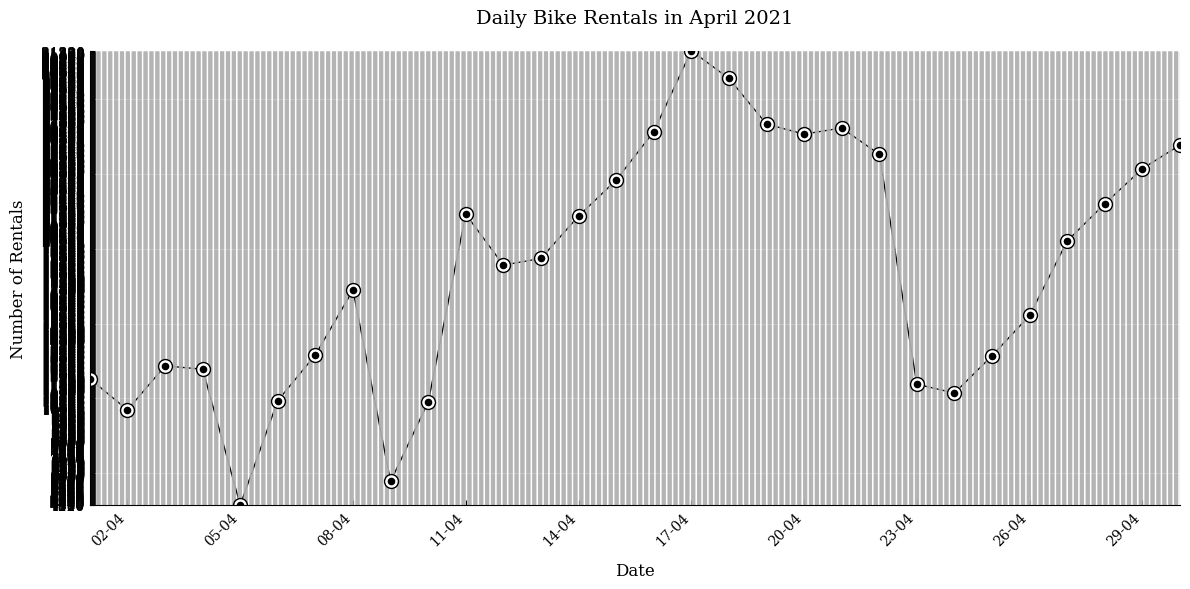

In [35]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as ticker

plt.rcParams['font.family'] = 'serif'

# Read CSV
df = pd.read_csv("/home/akupalo/informationviz/data/2021-04.csv")
df["Departure"] = pd.to_datetime(df["Departure"], errors='coerce')
df = df.dropna(subset=["Departure"])
df["Date"] = df["Departure"].dt.date

daily_totals = df.groupby("Date").size().reset_index(name="Count")
daily_totals["Date"] = pd.to_datetime(daily_totals["Date"])

x = daily_totals["Date"]
y = daily_totals["Count"]

# Plot
fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure width for better spacing
ax.plot(x, y, linestyle='-', color='black', linewidth=1, zorder=1)
ax.scatter(x, y, color='white', s=100, edgecolors='black', linewidth=1, zorder=2)
ax.scatter(x, y, color='black', s=20, zorder=3)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set y-axis bounds
ax.spines['left'].set_bounds(y.min(), y.max())

# Set x-ticks and format them
ax.xaxis.set_major_locator(mdates.DayLocator(interval=3))  # Show labels every 3 days
ax.xaxis.set_major_formatter(mdates.DateFormatter("%d-%m"))
plt.xticks(rotation=45, ha='right')  # Rotate and align x-axis labels

# Set y-ticks
ax.yaxis.set_major_locator(ticker.MultipleLocator(base=30))
ax.tick_params(direction='in')

# Add grid lines for y-axis only
ax.grid(axis='y', linestyle='--', alpha=0.7)

# Set x and y limits
ax.set_xlim([x.min(), x.max()])
ax.set_ylim([y.min(), y.max()])

# Add title and axis labels
ax.set_title("Daily Bike Rentals in April 2021", fontsize=14, pad=20)
ax.set_xlabel("Date", fontsize=12, labelpad=10)
ax.set_ylabel("Number of Rentals", fontsize=12, labelpad=10)

# Adjust layout to prevent overlap
plt.tight_layout()

# Show plot
plt.show()